<a href="https://colab.research.google.com/github/oliverfoster27/Practical-Machine-Learning/blob/master/Week%203/Problem_1_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns

In [2]:
!wget https://storage.googleapis.com/nicksdemobucket/wines.csv

--2019-03-21 23:35:26--  https://storage.googleapis.com/nicksdemobucket/wines.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10957 (11K) [application/octet-stream]
Saving to: ‘wines.csv’

wines.csv           100%[===================>]  10.70K  --.-KB/s    in 0s      

2019-03-21 23:35:26 (61.9 MB/s) - ‘wines.csv’ saved [10957/10957]



In [5]:
df = pd.read_csv('wines.csv')
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
features = df.drop(['Malic_acid'], axis=1).values
labels = df[['Malic_acid']].values
print(features.shape, labels.shape)

(178, 13) (178, 1)


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [50]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(13,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',
             loss='mean_squared_error',
             metrics=['mean_absolute_error'])

h = model.fit(features, labels, epochs=100, validation_split=0.2)

Train on 142 samples, validate on 36 samples
Epoch 1/100
142/142 [==============================] - 0s 2ms/sample - loss: 6166.1856 - mean_absolute_error: 69.3383 - val_loss: 1982.9936 - val_mean_absolute_error: 43.1209
Epoch 2/100
142/142 [==============================] - 0s 109us/sample - loss: 3455.9632 - mean_absolute_error: 51.3605 - val_loss: 917.2640 - val_mean_absolute_error: 29.1357
Epoch 3/100
142/142 [==============================] - 0s 106us/sample - loss: 1669.3302 - mean_absolute_error: 34.6922 - val_loss: 306.4476 - val_mean_absolute_error: 16.5015
Epoch 4/100
142/142 [==============================] - 0s 100us/sample - loss: 601.7461 - mean_absolute_error: 19.8465 - val_loss: 47.5328 - val_mean_absolute_error: 5.8615
Epoch 5/100
142/142 [==============================] - 0s 86us/sample - loss: 143.3863 - mean_absolute_error: 8.9715 - val_loss: 13.1933 - val_mean_absolute_error: 3.0246
Epoch 6/100
142/142 [==============================] - 0s 84us/sample - loss: 31.774

In [51]:
h.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

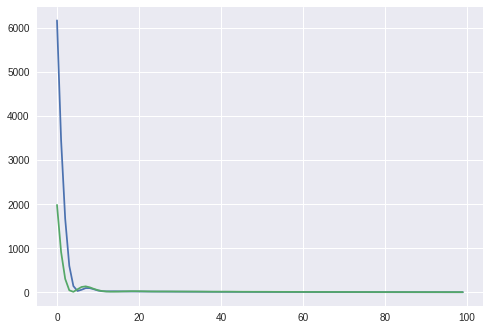

In [52]:
import matplotlib.pyplot as plt
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

In [0]:
model.save('my_good_model.h5')

In [0]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model('my_good_model.h5')

In [55]:
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 16)                224       
_________________________________________________________________
dense_12 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________
